In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

import missingno as msno

In [2]:
# WINDOW
t_iden = pd.read_csv(r"C:\Users\EPOPCON\Desktop\Kaggle\train_identity.csv")
t_tran = pd.read_csv(r"C:\Users\EPOPCON\Desktop\Kaggle\train_transaction.csv")

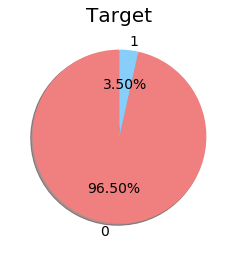

In [3]:
t_tran = t_tran.rename(columns = {'isFraud':'Target'})
Target = t_tran['Target'].value_counts()
Target_names = Target.index.tolist()
group_colors=['lightcoral','lightskyblue']

plt.pie(Target,labels = Target_names, colors = group_colors, shadow = True,
        startangle = 90,textprops = {'fontsize': 14}, autopct = '%1.2f%%')
plt.title('Target', fontsize=20)
plt.show()

In [4]:
df = pd.merge(t_iden,t_tran, on = 'TransactionID')

df = df.rename(columns = {'isFraud':'Target'})

df = df.set_index('TransactionID')

In [5]:
sample = df[['Target','V280',
       'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292',
       'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V303', 'V304', 'V305', 'V306']]

sample = sample.dropna()

In [6]:
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import * 

In [7]:
# 특징을 전부 적용했을 때의 정확도 계산
from sklearn.tree import DecisionTreeClassifier #Decision Tree
X = sample.drop('Target', axis = 1)
Y = sample['Target']
feature_names = X.columns.tolist() # 컬럼을 리스트화

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
model = DecisionTreeClassifier(max_depth = 5, random_state = 13)
model.fit(Train_X, Train_Y)
predicted = model.predict(Test_X)
print (roc_auc_score(Test_Y, predicted))

0.5227561433258321


In [8]:
from tqdm import tqdm

In [ ]:
Number_of_better_feature_set = 0
len_ = len(feature_names)
for L in tqdm(range(2, len_)): # 2부터 feature -1 개수만큼 for문을 반복
    for subset in itertools.combinations(feature_names, L): # feature_names에서 L개를 선택하는 모든 조합(튜플)
        New_Train_X = Train_X[list(subset)] # X[tuple]은 작동하지 않아서, X[list]형태로 바꿔준 것
        New_Test_X = Test_X[list(subset)]        
        model = DecisionTreeClassifier()
        model.fit(New_Train_X, Train_Y) 
        predicted = model.predict(New_Test_X)
        New_accuracy = roc_auc_score(Test_Y, predicted)
        if New_accuracy > 0.55:
            Number_of_better_feature_set += 1
            print(list(subset), '\t', len(subset), '\t', New_accuracy) 

 25%|████████████████████▌                                                             | 4/16 [08:13<26:59, 134.98s/it]

['V280', 'V285', 'V291', 'V294', 'V303', 'V306'] 	 6 	 0.550157388499628
['V284', 'V285', 'V290', 'V291', 'V294', 'V306'] 	 6 	 0.5500286670696256
['V285', 'V286', 'V291', 'V294', 'V298', 'V306'] 	 6 	 0.5501064734389489
['V285', 'V290', 'V291', 'V294', 'V298', 'V306'] 	 6 	 0.5512185225124859
['V285', 'V290', 'V291', 'V294', 'V304', 'V306'] 	 6 	 0.5502611303253925
['V285', 'V291', 'V293', 'V294', 'V298', 'V306'] 	 6 	 0.5507343833716721
['V285', 'V291', 'V294', 'V298', 'V303', 'V306'] 	 6 	 0.5519392881764397


 31%|█████████████████████████                                                       | 5/16 [23:01<1:06:11, 361.00s/it]

['V280', 'V285', 'V286', 'V291', 'V294', 'V303', 'V306'] 	 7 	 0.5507234972771381
['V280', 'V285', 'V287', 'V291', 'V295', 'V303', 'V306'] 	 7 	 0.5504375594009041
['V280', 'V285', 'V290', 'V291', 'V294', 'V303', 'V306'] 	 7 	 0.5505252960125585
['V280', 'V285', 'V290', 'V291', 'V298', 'V304', 'V306'] 	 7 	 0.5504317924259462
['V280', 'V285', 'V290', 'V292', 'V294', 'V303', 'V306'] 	 7 	 0.550093027784627
['V280', 'V285', 'V291', 'V293', 'V298', 'V304', 'V306'] 	 7 	 0.5500571620858546
['V280', 'V285', 'V291', 'V294', 'V297', 'V303', 'V306'] 	 7 	 0.5505060833832783
['V280', 'V285', 'V291', 'V294', 'V298', 'V303', 'V306'] 	 7 	 0.5502995555839527
['V280', 'V285', 'V291', 'V294', 'V299', 'V303', 'V306'] 	 7 	 0.5502777833948845
['V280', 'V285', 'V291', 'V295', 'V298', 'V304', 'V306'] 	 7 	 0.5503456595218768
['V280', 'V285', 'V291', 'V295', 'V303', 'V304', 'V306'] 	 7 	 0.5503296543077667
['V280', 'V285', 'V292', 'V298', 'V303', 'V304', 'V306'] 	 7 	 0.5504401189606921
['V284', 'V285', 

 38%|██████████████████████████████                                                  | 6/16 [52:47<2:11:24, 788.47s/it]

['V280', 'V284', 'V285', 'V286', 'V291', 'V294', 'V303', 'V306'] 	 8 	 0.55068251245879
['V280', 'V284', 'V285', 'V287', 'V291', 'V293', 'V294', 'V306'] 	 8 	 0.5500245038022527
['V280', 'V284', 'V285', 'V287', 'V291', 'V295', 'V303', 'V306'] 	 8 	 0.5502159822396714
['V280', 'V284', 'V285', 'V290', 'V291', 'V294', 'V303', 'V306'] 	 8 	 0.5518464324452093
['V280', 'V284', 'V285', 'V290', 'V291', 'V298', 'V304', 'V306'] 	 8 	 0.5508749467484118
['V280', 'V284', 'V285', 'V290', 'V292', 'V294', 'V303', 'V306'] 	 8 	 0.5511817009615108
['V280', 'V284', 'V285', 'V291', 'V293', 'V294', 'V303', 'V306'] 	 8 	 0.550374802393488
['V280', 'V284', 'V285', 'V291', 'V293', 'V298', 'V304', 'V306'] 	 8 	 0.5504702176845062
['V280', 'V284', 'V285', 'V291', 'V298', 'V299', 'V304', 'V306'] 	 8 	 0.5500722114477617
['V280', 'V284', 'V285', 'V291', 'V298', 'V303', 'V304', 'V306'] 	 8 	 0.5502829025144605
['V280', 'V284', 'V285', 'V292', 'V294', 'V303', 'V304', 'V306'] 	 8 	 0.5502736201275116
['V280', 'V28

['V284', 'V285', 'V286', 'V290', 'V291', 'V294', 'V295', 'V306'] 	 8 	 0.5505236923049734
['V284', 'V285', 'V286', 'V290', 'V291', 'V294', 'V297', 'V306'] 	 8 	 0.5513907883206247
['V284', 'V285', 'V286', 'V290', 'V291', 'V294', 'V298', 'V306'] 	 8 	 0.5526859892968343
['V284', 'V285', 'V286', 'V290', 'V291', 'V294', 'V299', 'V306'] 	 8 	 0.5519351249090666
['V284', 'V285', 'V286', 'V290', 'V291', 'V294', 'V304', 'V306'] 	 8 	 0.5512854427872753
['V284', 'V285', 'V286', 'V290', 'V291', 'V298', 'V304', 'V306'] 	 8 	 0.5503539860566228
['V284', 'V285', 'V286', 'V291', 'V293', 'V294', 'V298', 'V306'] 	 8 	 0.5532194397907423
['V284', 'V285', 'V286', 'V291', 'V293', 'V294', 'V299', 'V306'] 	 8 	 0.5504375594009041
['V284', 'V285', 'V286', 'V291', 'V294', 'V297', 'V298', 'V306'] 	 8 	 0.5518707641940653
['V284', 'V285', 'V286', 'V291', 'V294', 'V298', 'V299', 'V306'] 	 8 	 0.5500462759913207
['V284', 'V285', 'V286', 'V291', 'V294', 'V298', 'V303', 'V306'] 	 8 	 0.5520446337097891
['V284', '

['V285', 'V286', 'V290', 'V291', 'V294', 'V304', 'V305', 'V306'] 	 8 	 0.5506508100273909
['V285', 'V286', 'V291', 'V292', 'V293', 'V298', 'V303', 'V306'] 	 8 	 0.5504442822280651
['V285', 'V286', 'V291', 'V292', 'V295', 'V298', 'V304', 'V306'] 	 8 	 0.5500914240770418
['V285', 'V286', 'V291', 'V293', 'V294', 'V295', 'V298', 'V306'] 	 8 	 0.550966846627439
['V285', 'V286', 'V291', 'V293', 'V294', 'V295', 'V303', 'V306'] 	 8 	 0.550108077146534
['V285', 'V286', 'V291', 'V293', 'V294', 'V297', 'V298', 'V306'] 	 8 	 0.5518489920049973
['V285', 'V286', 'V291', 'V293', 'V294', 'V297', 'V304', 'V306'] 	 8 	 0.5506014986742966
['V285', 'V286', 'V291', 'V293', 'V294', 'V298', 'V299', 'V306'] 	 8 	 0.5513305908729964
['V285', 'V286', 'V291', 'V293', 'V294', 'V298', 'V303', 'V306'] 	 8 	 0.5518983033580914
['V285', 'V286', 'V291', 'V293', 'V294', 'V298', 'V304', 'V306'] 	 8 	 0.55205135653695
['V285', 'V286', 'V291', 'V293', 'V294', 'V298', 'V305', 'V306'] 	 8 	 0.5513949515879977
['V285', 'V286

['V285', 'V291', 'V292', 'V293', 'V298', 'V303', 'V304', 'V306'] 	 8 	 0.5510721921607884
['V285', 'V291', 'V292', 'V293', 'V298', 'V303', 'V305', 'V306'] 	 8 	 0.5501749974213231
['V285', 'V291', 'V292', 'V293', 'V299', 'V303', 'V304', 'V306'] 	 8 	 0.5508464517321826
['V285', 'V291', 'V293', 'V294', 'V295', 'V297', 'V303', 'V306'] 	 8 	 0.5517737451954621
['V285', 'V291', 'V293', 'V294', 'V295', 'V298', 'V303', 'V306'] 	 8 	 0.5504157872118361
['V285', 'V291', 'V293', 'V294', 'V295', 'V298', 'V305', 'V306'] 	 8 	 0.5500245038022527
['V285', 'V291', 'V293', 'V294', 'V295', 'V303', 'V305', 'V306'] 	 8 	 0.5504759846594642
['V285', 'V291', 'V293', 'V294', 'V297', 'V298', 'V299', 'V306'] 	 8 	 0.5500546025260667
['V285', 'V291', 'V293', 'V294', 'V297', 'V298', 'V303', 'V306'] 	 8 	 0.5523715564043712
['V285', 'V291', 'V293', 'V294', 'V297', 'V298', 'V304', 'V306'] 	 8 	 0.5510680288934153
['V285', 'V291', 'V293', 'V294', 'V297', 'V298', 'V305', 'V306'] 	 8 	 0.5507644820954863
['V285', '

 44%|█████████████████████████████████▋                                           | 7/16 [1:39:28<3:28:49, 1392.16s/it]

['V280', 'V284', 'V285', 'V286', 'V287', 'V291', 'V293', 'V294', 'V306'] 	 9 	 0.5505838897526016
['V280', 'V284', 'V285', 'V286', 'V287', 'V291', 'V295', 'V303', 'V306'] 	 9 	 0.5502528037906464
['V280', 'V284', 'V285', 'V286', 'V287', 'V292', 'V294', 'V303', 'V306'] 	 9 	 0.5501599480594161
['V280', 'V284', 'V285', 'V286', 'V290', 'V291', 'V293', 'V298', 'V306'] 	 9 	 0.5505989391145086
['V280', 'V284', 'V285', 'V286', 'V290', 'V291', 'V294', 'V297', 'V306'] 	 9 	 0.5500395531641598
['V280', 'V284', 'V285', 'V286', 'V290', 'V291', 'V294', 'V298', 'V306'] 	 9 	 0.5504935935811593
['V280', 'V284', 'V285', 'V286', 'V290', 'V291', 'V294', 'V303', 'V306'] 	 9 	 0.5514183274846507
['V280', 'V284', 'V285', 'V286', 'V290', 'V291', 'V298', 'V304', 'V306'] 	 9 	 0.5512771162525292
['V280', 'V284', 'V285', 'V286', 'V290', 'V291', 'V299', 'V303', 'V306'] 	 9 	 0.5500203405348797
['V280', 'V284', 'V285', 'V286', 'V290', 'V292', 'V294', 'V303', 'V306'] 	 9 	 0.5522921463274628
['V280', 'V284', 'V2

['V280', 'V284', 'V285', 'V290', 'V292', 'V294', 'V303', 'V304', 'V306'] 	 9 	 0.5505019201159054
['V280', 'V284', 'V285', 'V290', 'V292', 'V294', 'V303', 'V305', 'V306'] 	 9 	 0.5519735501676267
['V280', 'V284', 'V285', 'V290', 'V292', 'V298', 'V303', 'V304', 'V306'] 	 9 	 0.5519828325545758
['V280', 'V284', 'V285', 'V290', 'V294', 'V297', 'V298', 'V303', 'V306'] 	 9 	 0.5501490619648821
['V280', 'V284', 'V285', 'V291', 'V292', 'V293', 'V298', 'V304', 'V306'] 	 9 	 0.5507670416552743
['V280', 'V284', 'V285', 'V291', 'V292', 'V294', 'V295', 'V303', 'V306'] 	 9 	 0.5505963795547207
['V280', 'V284', 'V285', 'V291', 'V292', 'V294', 'V303', 'V304', 'V306'] 	 9 	 0.5505252960125585
['V280', 'V284', 'V285', 'V291', 'V292', 'V297', 'V298', 'V304', 'V306'] 	 9 	 0.5507846505769695
['V280', 'V284', 'V285', 'V291', 'V292', 'V298', 'V299', 'V304', 'V306'] 	 9 	 0.5517679782205039
['V280', 'V284', 'V285', 'V291', 'V292', 'V298', 'V303', 'V304', 'V306'] 	 9 	 0.5506357606654838
['V280', 'V284', 'V2

['V280', 'V285', 'V286', 'V287', 'V292', 'V298', 'V303', 'V304', 'V306'] 	 9 	 0.5507026809402732
['V280', 'V285', 'V286', 'V290', 'V291', 'V292', 'V293', 'V294', 'V306'] 	 9 	 0.5508013036464614
['V280', 'V285', 'V286', 'V290', 'V291', 'V292', 'V294', 'V303', 'V306'] 	 9 	 0.5521909640614865
['V280', 'V285', 'V286', 'V290', 'V291', 'V292', 'V298', 'V304', 'V306'] 	 9 	 0.5500036874653874
['V280', 'V285', 'V286', 'V290', 'V291', 'V292', 'V299', 'V303', 'V306'] 	 9 	 0.5513523630620645
['V280', 'V285', 'V286', 'V290', 'V291', 'V293', 'V294', 'V298', 'V306'] 	 9 	 0.5504935935811593
['V280', 'V285', 'V286', 'V290', 'V291', 'V293', 'V294', 'V303', 'V306'] 	 9 	 0.5510312073424403
['V280', 'V285', 'V286', 'V290', 'V291', 'V294', 'V295', 'V298', 'V306'] 	 9 	 0.5500546025260667
['V280', 'V285', 'V286', 'V290', 'V291', 'V294', 'V295', 'V303', 'V306'] 	 9 	 0.5505211327451854
['V280', 'V285', 'V286', 'V290', 'V291', 'V294', 'V297', 'V299', 'V306'] 	 9 	 0.5501666708865771
['V280', 'V285', 'V2

['V280', 'V285', 'V287', 'V290', 'V291', 'V293', 'V294', 'V295', 'V306'] 	 9 	 0.5504743809518792
['V280', 'V285', 'V287', 'V290', 'V291', 'V293', 'V294', 'V297', 'V306'] 	 9 	 0.5501064734389489
['V280', 'V285', 'V287', 'V290', 'V291', 'V293', 'V294', 'V298', 'V306'] 	 9 	 0.5508682239212508
['V280', 'V285', 'V287', 'V290', 'V291', 'V293', 'V294', 'V299', 'V306'] 	 9 	 0.5508615010940897
['V280', 'V285', 'V287', 'V290', 'V291', 'V293', 'V299', 'V303', 'V306'] 	 9 	 0.5508163530083684
['V280', 'V285', 'V287', 'V290', 'V291', 'V294', 'V295', 'V297', 'V306'] 	 9 	 0.5500680481803887
['V280', 'V285', 'V287', 'V290', 'V291', 'V294', 'V295', 'V299', 'V306'] 	 9 	 0.5511198998062977
['V280', 'V285', 'V287', 'V290', 'V291', 'V294', 'V297', 'V298', 'V306'] 	 9 	 0.5501131962661099
['V280', 'V285', 'V287', 'V290', 'V291', 'V294', 'V297', 'V303', 'V306'] 	 9 	 0.5510078314457871
['V280', 'V285', 'V287', 'V290', 'V291', 'V294', 'V298', 'V304', 'V306'] 	 9 	 0.5512963288818093
['V280', 'V285', 'V2

['V280', 'V285', 'V290', 'V291', 'V293', 'V294', 'V297', 'V298', 'V306'] 	 9 	 0.5512335718743929
['V280', 'V285', 'V290', 'V291', 'V293', 'V294', 'V297', 'V303', 'V306'] 	 9 	 0.5541400104268606
['V280', 'V285', 'V290', 'V291', 'V293', 'V294', 'V298', 'V303', 'V306'] 	 9 	 0.5522444386819537
['V280', 'V285', 'V290', 'V291', 'V293', 'V294', 'V298', 'V304', 'V306'] 	 9 	 0.5503623125913689
['V280', 'V285', 'V290', 'V291', 'V293', 'V294', 'V299', 'V303', 'V306'] 	 9 	 0.5516892159989777
['V280', 'V285', 'V290', 'V291', 'V293', 'V294', 'V303', 'V304', 'V306'] 	 9 	 0.5519175159873716
['V280', 'V285', 'V290', 'V291', 'V293', 'V294', 'V303', 'V305', 'V306'] 	 9 	 0.5529200562601861
['V280', 'V285', 'V290', 'V291', 'V293', 'V295', 'V298', 'V304', 'V306'] 	 9 	 0.5519978819164828
['V280', 'V285', 'V290', 'V291', 'V293', 'V295', 'V303', 'V304', 'V306'] 	 9 	 0.5506850720185781
['V280', 'V285', 'V290', 'V291', 'V293', 'V297', 'V298', 'V304', 'V306'] 	 9 	 0.5511416719953657
['V280', 'V285', 'V2

['V280', 'V285', 'V291', 'V292', 'V295', 'V297', 'V298', 'V304', 'V306'] 	 9 	 0.5508448480245977
['V280', 'V285', 'V291', 'V292', 'V295', 'V298', 'V303', 'V304', 'V306'] 	 9 	 0.5504827074866253
['V280', 'V285', 'V291', 'V292', 'V295', 'V298', 'V304', 'V305', 'V306'] 	 9 	 0.5508640606538777
['V280', 'V285', 'V291', 'V292', 'V295', 'V299', 'V303', 'V304', 'V306'] 	 9 	 0.5500052911729726
['V280', 'V285', 'V291', 'V292', 'V295', 'V303', 'V304', 'V305', 'V306'] 	 9 	 0.5502569670580195
['V280', 'V285', 'V291', 'V292', 'V297', 'V298', 'V299', 'V304', 'V306'] 	 9 	 0.5506876315783661
['V280', 'V285', 'V291', 'V292', 'V297', 'V298', 'V303', 'V304', 'V306'] 	 9 	 0.5505044796756934
['V280', 'V285', 'V291', 'V292', 'V297', 'V298', 'V304', 'V305', 'V306'] 	 9 	 0.5507436657586213
['V280', 'V285', 'V291', 'V292', 'V297', 'V299', 'V303', 'V304', 'V306'] 	 9 	 0.5504292328661582
['V280', 'V285', 'V291', 'V292', 'V298', 'V299', 'V303', 'V304', 'V306'] 	 9 	 0.5506098252090428
['V280', 'V285', 'V2

In [ ]:
# 랜덤 언더샘플링
%time
import imblearn.under_sampling as usam
import imblearn.over_sampling as osam 
from sklearn.ensemble import RandomForestClassifier
rus = usam.RandomUnderSampler()
undersampled_X, undersampled_Y = rus.fit_sample(train_X, train_Y)
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=13).fit(undersampled_X, undersampled_Y)
predicted = model.predict(test_X)
print (roc_auc_score(test_Y, predicted))
# -> 이거 56퍼나옴